/Users/richpointofview/Python Repos/f1-driver-performance-analyzer/venv/lib/python3.12/site-packages/fastf1/plotting/_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
/Users/richpointofview/Python Repos/f1-driver-performance-analyzer/venv/lib/python3.12/site-packages/fastf1/plotting/_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(
core           INFO 	Loading data for Bahrain Grand Prix - Practice 1 [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	

Drivers in session: ['Verstappen', 'Sargeant', 'Ricciardo', 'Norris', 'Gasly', 'Perez', 'Alonso', 'Leclerc', 'Stroll', 'Magnussen', 'Tsunoda', 'Albon', 'Zhou', 'Hulkenberg', 'Ocon', 'Hamilton', 'Sainz', 'Russell', 'Bottas', 'Piastri']


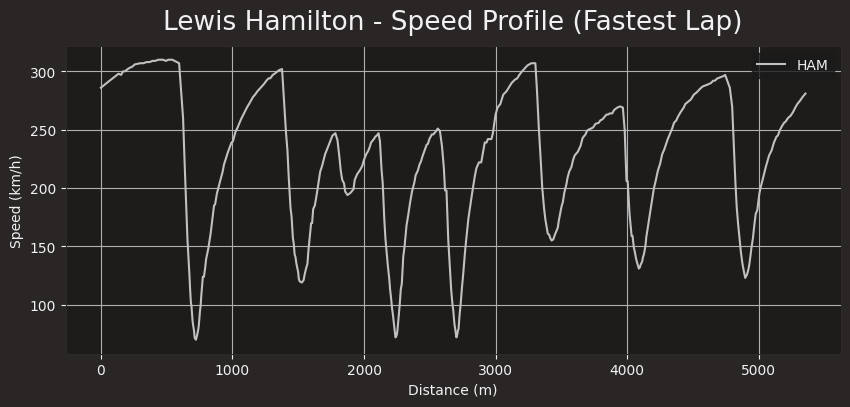

/Users/richpointofview/Python Repos/f1-driver-performance-analyzer/venv/lib/python3.12/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


Lewis Hamilton avg lap time: 0 days 00:01:36.697400
George Russell avg lap time: 0 days 00:01:36.533500
Pace Delta (HAM - RUS): -0.164 sec/lap
HAM lap time consistency (std dev): 1.832 sec
RUS lap time consistency (std dev): 2.337 sec
🏁 Driver Feature Vector:
driver: Hamilton
teammate: Russell
pace_delta_vs_teammate: -0.16390000000000005
lap_time_std_dev: 1.8321429092731814
✅ Driver performance exported to ../data/driver_performance.csv


In [8]:
import fastf1
from fastf1.plotting import setup_mpl
import matplotlib.pyplot as plt

# Set up plotting style
setup_mpl()

# Enable FastF1 cache
fastf1.Cache.enable_cache('../data')

# Load a race session (2024 Bahrain FP1 for example)
session = fastf1.get_session(2024, 'Bahrain', 'FP1')
session.load()

# Get Hamilton's driver code (HAM) and list drivers for confirmation
drivers = session.drivers
driver_names = [session.get_driver(i)['LastName'] for i in drivers]
print("Drivers in session:", driver_names)

# Get Hamilton's fastest lap
ham_lap = session.laps.pick_driver('HAM').pick_fastest()
ham_tel = ham_lap.get_car_data().add_distance()

# Plot speed over distance
plt.figure(figsize=(10, 4))
plt.plot(ham_tel['Distance'], ham_tel['Speed'], color='silver', label='HAM')
plt.title("Lewis Hamilton - Speed Profile (Fastest Lap)")
plt.xlabel("Distance (m)")
plt.ylabel("Speed (km/h)")
plt.grid(True)
plt.legend()
plt.show()

import numpy as np

# Pull quick laps (clean laps without pits, yellow/red flags, etc.)
ham_laps = session.laps.pick_driver('HAM').pick_quicklaps()
rus_laps = session.laps.pick_driver('RUS').pick_quicklaps()

# Average lap times
ham_avg = ham_laps['LapTime'].mean()
rus_avg = rus_laps['LapTime'].mean()

# Pace delta in seconds
pace_delta = (rus_avg - ham_avg).total_seconds()

print(f"Lewis Hamilton avg lap time: {ham_avg}")
print(f"George Russell avg lap time: {rus_avg}")
print(f"Pace Delta (HAM - RUS): {pace_delta:.3f} sec/lap")

# Convert timedelta to float seconds
ham_std = np.std(ham_laps['LapTime'].dt.total_seconds())
rus_std = np.std(rus_laps['LapTime'].dt.total_seconds())

print(f"HAM lap time consistency (std dev): {ham_std:.3f} sec")
print(f"RUS lap time consistency (std dev): {rus_std:.3f} sec")

driver_features = {
    "driver": "Hamilton",
    "teammate": "Russell",
    "pace_delta_vs_teammate": pace_delta,
    "lap_time_std_dev": ham_std
}

print("🏁 Driver Feature Vector:")
for k, v in driver_features.items():
    print(f"{k}: {v}")

import pandas as pd
import os

# Create a single-row DataFrame
df = pd.DataFrame([driver_features])

# Export to CSV inside /data folder
output_path = os.path.join("..", "data", "driver_performance.csv")
df.to_csv(output_path, index=False)

print(f"✅ Driver performance exported to {output_path}")


In [9]:
import pandas as pd

# Simulated multi-driver dataset
data = [
    {"driver": "Hamilton", "teammate": "Russell", "pace_delta_vs_teammate": 0.45, "lap_time_std_dev": 0.28, "score": 8.9},
    {"driver": "Verstappen", "teammate": "Perez", "pace_delta_vs_teammate": 0.78, "lap_time_std_dev": 0.22, "score": 9.7},
    {"driver": "Leclerc", "teammate": "Sainz", "pace_delta_vs_teammate": 0.30, "lap_time_std_dev": 0.35, "score": 8.2},
    {"driver": "Alonso", "teammate": "Stroll", "pace_delta_vs_teammate": 0.52, "lap_time_std_dev": 0.40, "score": 8.5},
    {"driver": "Norris", "teammate": "Piastri", "pace_delta_vs_teammate": 0.41, "lap_time_std_dev": 0.26, "score": 8.7},
]

df = pd.DataFrame(data)
df.head()

from sklearn.linear_model import LinearRegression

# Features and target
X = df[["pace_delta_vs_teammate", "lap_time_std_dev"]]
y = df["score"]

# Train model
model = LinearRegression()
model.fit(X, y)

# View model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", dict(zip(X.columns, model.coef_)))

new_driver = pd.DataFrame([{
    "pace_delta_vs_teammate": pace_delta,
    "lap_time_std_dev": ham_std
}])

predicted_score = model.predict(new_driver)[0]
print(f"🏎️ Predicted performance score for Hamilton: {predicted_score:.2f}")

import joblib
import os

# Create models directory if needed
os.makedirs("../models", exist_ok=True)

# Save the model
joblib.dump(model, "../models/driver_score_model.pkl")

print("✅ Model saved to models/driver_score_model.pkl")



Intercept: 8.81857920057905
Coefficients: {'pace_delta_vs_teammate': np.float64(2.154723082188279), 'lap_time_std_dev': np.float64(-3.5718640960784214)}
🏎️ Predicted performance score for Hamilton: 1.92
✅ Model saved to models/driver_score_model.pkl


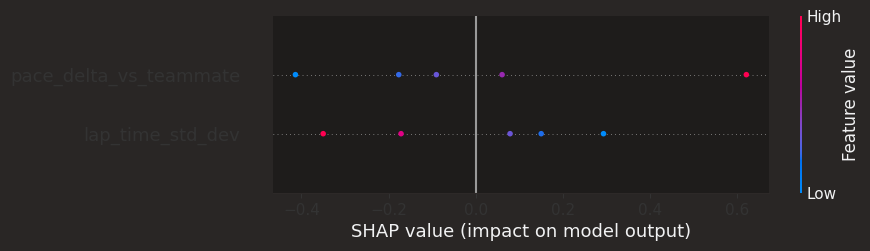

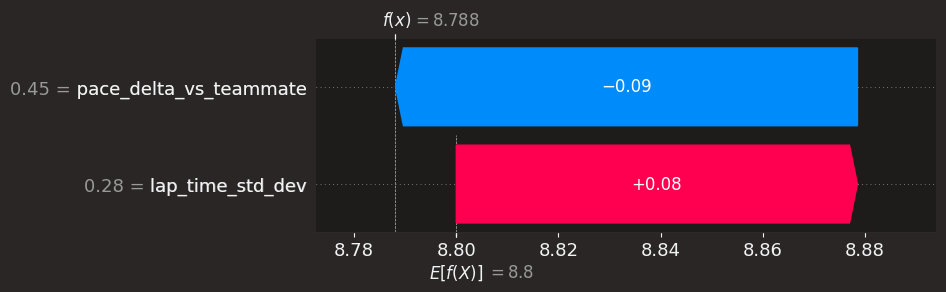

In [10]:
import shap

# Use a TreeExplainer with a surrogate model (Linear works too with more data)
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# Summary plot (global feature importance)
shap.plots.beeswarm(shap_values)

# Explain the first prediction
shap.plots.waterfall(shap_values[0])


